In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pit_stop = pd.read_csv("../Scraping/f1db_csv/pit_stops.csv")
drivers = pd.read_csv("../Scraping/f1db_csv/drivers.csv")
lap_time = pd.read_csv("../Scraping/f1db_csv/lap_times.csv")

In [3]:
merged_df1 = pd.merge(pit_stop, drivers, on="driverId")
merged_df = pd.merge(merged_df1, lap_time, on=["raceId","lap","driverId"])

In [4]:
merged_df

,raceId,driverId,stop,lap,time_x,duration,milliseconds_x,driverRef,number,code,forename,surname,dob,nationality,url,position,time_y,milliseconds_y
0,841,153,1,1,17:05:23,26.898,26898,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,21,2:13.879,133879
1,841,153,2,17,17:31:06,24.463,24463,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,17,1:57.713,117713
2,841,153,3,35,17:59:45,26.348,26348,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,14,1:58.520,118520
3,842,153,1,16,16:32:25,23.584,23584,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,13,1:56.329,116329
4,842,153,2,32,17:00:55,22.888,22888,alguersuari,\N,ALG,Jaime,Alguersuari,1990-03-23,Spanish,http://en.wikipedia.org/wiki/Jaime_Alguersuari,12,1:51.898,111898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10047,1107,857,3,22,15:31:40,29.912,29912,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,17,1:17.056,77056
10048,1107,857,4,41,15:54:36,22.313,22313,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,15,1:14.404,74404
10049,1108,857,1,29,15:48:05,28.655,28655,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,3,1:32.563,92563
10050,1109,857,1,18,15:28:39,21.171,21171,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,2,1:27.253,87253


In [5]:
for _ in merged_df.columns:
    print(merged_df[_].unique())

[ 841  842  843  844  845  846  847  848  849  850  851  853  854  855
  856  857  858  859  852  861  862  863  864  865  866  867  868  869
  870  871  872  873  874  875  876  877  878  879  860  880  881  882
  883  884  885  886  887  888  890  891  892  893  894  895  896  897
  898  899  900  901  902  903  904  905  906  907  908  909  910  911
  912  913  914  915  916  917  918  927  928  929  930  931  932  934
  936  937  938  939  940  941  942  944  945  948  950  951  952  953
  954  955  956  957  958  959  960  961  962  963  964  965  966  967
  968  969  970  971  973  975  976  978  979  980  981  982  983  984
  985  986  987  988  989  990  991  992  993  994  995  996  997  998
  999 1000 1003 1004 1005 1008 1009 1052 1053 1054 1055 1056 1057 1059
 1058 1060 1061 1062 1064 1065 1066 1067 1069 1070 1071 1051 1072 1073
 1074 1075 1076 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087 1088
 1092 1093 1094 1095 1096 1098 1099 1100 1101 1102 1104 1105 1106 1107
 1108 

In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   raceId          10052 non-null  int64 
 1   driverId        10052 non-null  int64 
 2   stop            10052 non-null  int64 
 3   lap             10052 non-null  int64 
 4   time_x          10052 non-null  object
 5   duration        10052 non-null  object
 6   milliseconds_x  10052 non-null  int64 
 7   driverRef       10052 non-null  object
 8   number          10052 non-null  object
 9   code            10052 non-null  object
 10  forename        10052 non-null  object
 11  surname         10052 non-null  object
 12  dob             10052 non-null  object
 13  nationality     10052 non-null  object
 14  url             10052 non-null  object
 15  position        10052 non-null  int64 
 16  time_y          10052 non-null  object
 17  milliseconds_y  10052 non-null  int64 
dtypes: int

In [7]:
merged_df.drop(['url','nationality','dob','number','driverRef','forename','surname','time_x','time_y','duration','code'], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   raceId          10052 non-null  int64
 1   driverId        10052 non-null  int64
 2   stop            10052 non-null  int64
 3   lap             10052 non-null  int64
 4   milliseconds_x  10052 non-null  int64
 5   position        10052 non-null  int64
 6   milliseconds_y  10052 non-null  int64
dtypes: int64(7)
memory usage: 549.8 KB


In [8]:
merged_df.rename(columns={'milliseconds_x':'pit_stop_time','milliseconds_y':'total_lap_time'}, inplace=True)

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   raceId          10052 non-null  int64
 1   driverId        10052 non-null  int64
 2   stop            10052 non-null  int64
 3   lap             10052 non-null  int64
 4   pit_stop_time   10052 non-null  int64
 5   position        10052 non-null  int64
 6   total_lap_time  10052 non-null  int64
dtypes: int64(7)
memory usage: 549.8 KB


<Axes: ylabel='Density'>

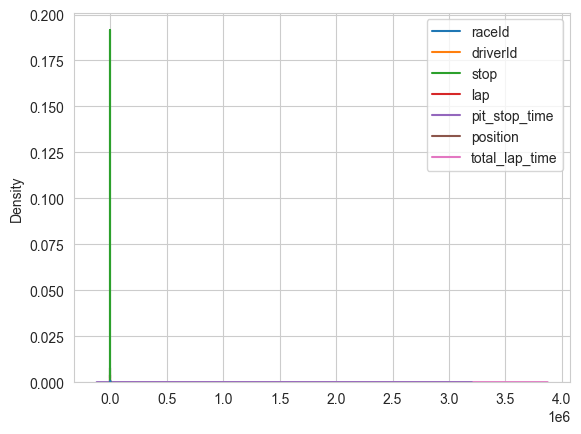

In [40]:
sns.kdeplot(merged_df)

/Users/nirmolcho/opt/anaconda3/lib/python3.9/ds_final_task/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


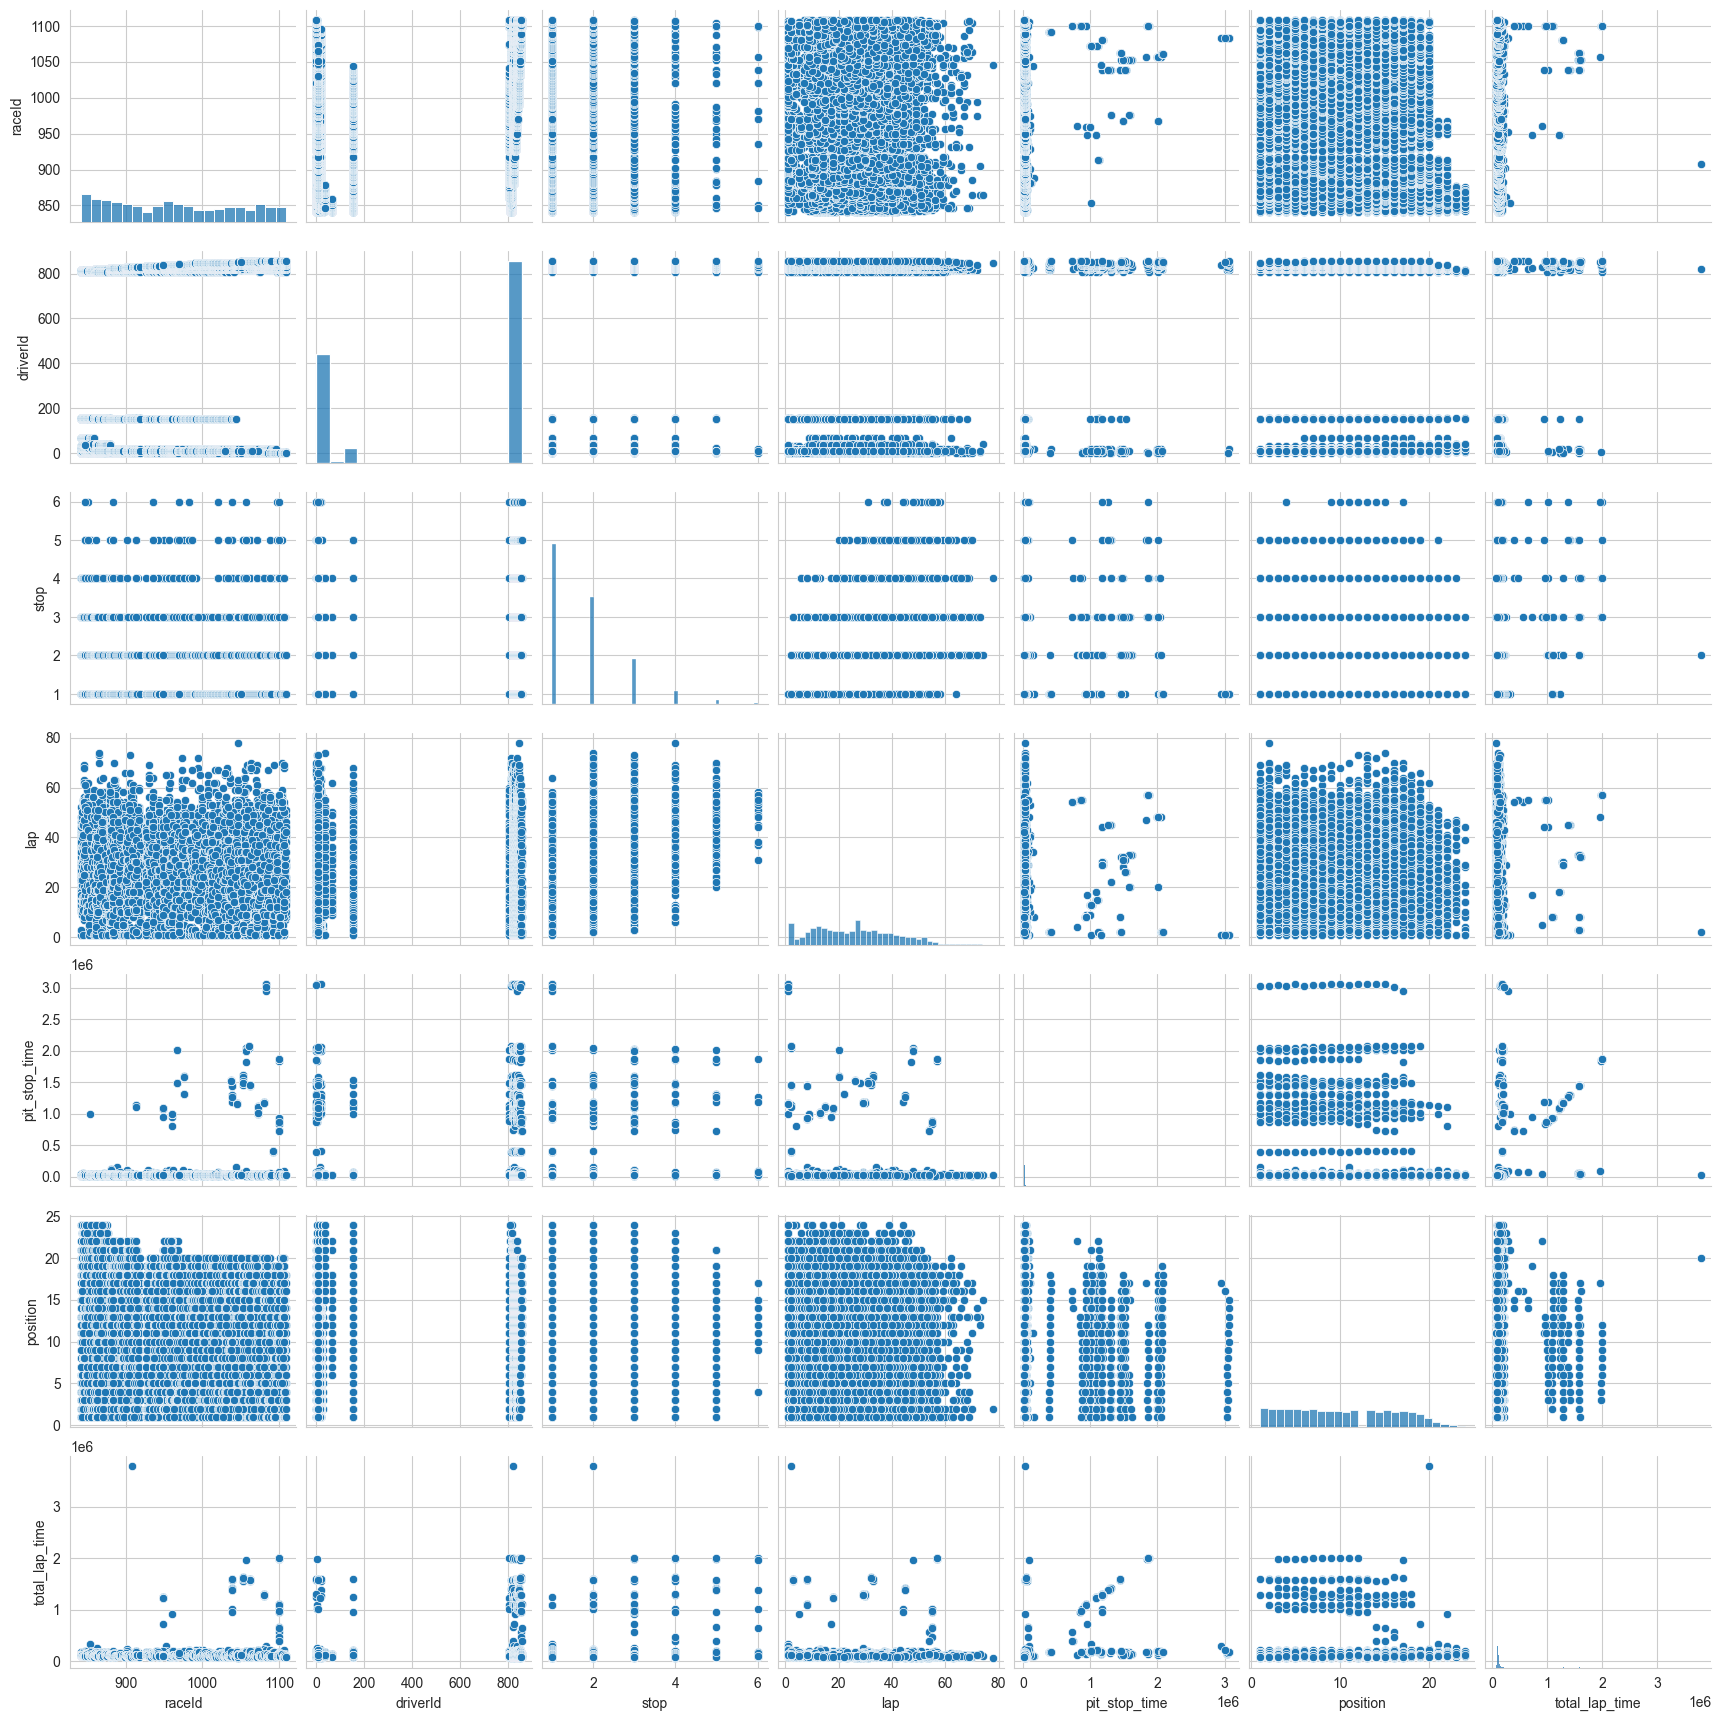

In [ ]:
sns.pairplot(merged_df)

<Axes: >

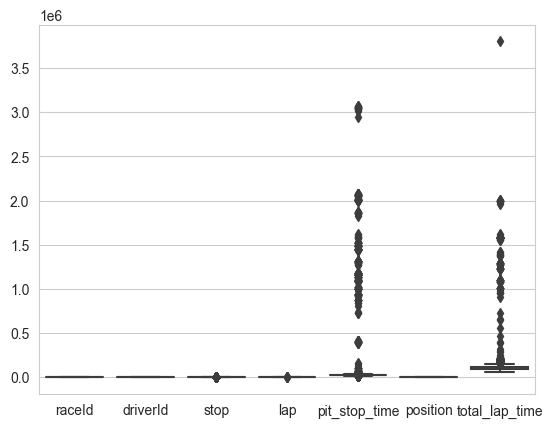

In [10]:
sns.boxplot(merged_df)

In [43]:
log_data = np.log(merged_df)

In [44]:
all_outliers = np.array([])
for feature in log_data.keys():
    print('Outliers of feature - '+feature + " :")
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    outlier_pts = log_data[~((log_data[feature] >=Q1-step) & (log_data[feature] <=Q3+step))]
    all_outliers = np.append(all_outliers,outlier_pts.index.values)
    print(outlier_pts)

Outliers of feature - raceId :
Empty DataFrame
Columns: [raceId, driverId, stop, lap, pit_stop_time, position, total_lap_time]
Index: []
Outliers of feature - driverId :
Empty DataFrame
Columns: [raceId, driverId, stop, lap, pit_stop_time, position, total_lap_time]
Index: []
Outliers of feature - stop :
         raceId  driverId      stop       lap  pit_stop_time  position  \
961    6.877296  2.564949  1.791759  3.871201       2.304785  2.564949   
984    6.889591  2.564949  1.791759  3.610918       2.331942  2.564949   
1415   6.946014  2.995732  1.791759  3.806662       2.642753  2.484907   
1776   6.746412  0.000000  1.791759  4.025352       2.249809  1.386294   
1940   6.841615  0.000000  1.791759  3.988984       2.273763  2.484907   
2079   6.927558  0.000000  1.791759  4.025352       2.290897  2.708050   
2857   6.741701  2.890372  1.791759  3.931826       2.310053  2.302585   
3505   6.877296  6.703188  1.791759  3.891820       2.306810  2.197225   
3955   6.841615  6.700731  1.

In [45]:
print(all_outliers)

[  961.   984.  1415. ... 10034. 10036. 10037.]


In [46]:
len(all_outliers)

1871

In [50]:
all_outliers2,indices = np.unique(all_outliers,return_inverse=True)
print(all_outliers2, '\n' ,len(all_outliers2))

[    0.    39.    43. ... 10036. 10037. 10045.] 
 1280


In [51]:
print(indices, '\n', len(indices))

[  76   83  120 ... 1276 1277 1278] 
 1871


In [52]:
counts = np.bincount(indices)
counts

array([1, 1, 1, ..., 2, 2, 1])

In [53]:
outliers = all_outliers2[counts>1]


In [54]:
outliers

array([  220.,   437.,   454.,   471.,   477.,   504.,   539.,   544.,
         545.,   560.,   565.,   584.,   594.,   598.,   600.,   601.,
         617.,   618.,   632.,   636.,   649.,   662.,   663.,   664.,
         673.,   767.,   852.,   875.,   893.,   906.,   933.,   937.,
         966.,   973.,   979.,   980.,  1028.,  1209.,  1260.,  1281.,
        1285.,  1315.,  1343.,  1412.,  1415.,  1424.,  1436.,  1445.,
        1450.,  1452.,  1453.,  1471.,  1472.,  1480.,  1484.,  1499.,
        1776.,  1907.,  1940.,  1958.,  1982.,  2014.,  2022.,  2023.,
        2109.,  2122.,  2131.,  2141.,  2147.,  2149.,  2170.,  2171.,
        2186.,  2191.,  2204.,  2215.,  2226.,  2306.,  2479.,  2527.,
        2550.,  2668.,  2764.,  2785.,  2827.,  2998.,  3050.,  3076.,
        3145.,  3213.,  3405.,  3454.,  3482.,  3486.,  3526.,  3527.,
        3546.,  3605.,  3608.,  3609.,  3618.,  3636.,  3641.,  3662.,
        3680.,  3683.,  3699.,  3713.,  3714.,  3715.,  3740.,  3764.,
      

In [55]:
good_data = log_data.drop(outliers)

In [56]:
len(good_data)

9561

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of labels (7).

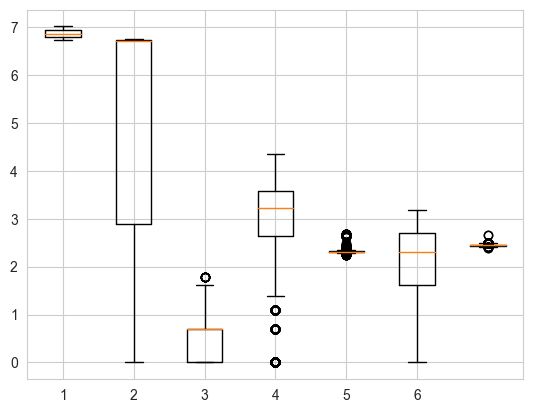

In [58]:
plt.boxplot(good_data)
plt.xticks(range(1,7),good_data.columns,rotation=15)
plt.show()

In [57]:
pwd

'/Users/nirmolcho/Library/Mobile Documents/com~apple~CloudDocs/College of manegment projects/2nd year/Semester 2/principles and technologies for Data science /Final Task /Clustering'

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=6).fit(good_data)
pca_samples = pca.transform(good_data)


In [61]:
pca_samples

array([[-0.17331178,  3.15057985,  0.03662161,  0.62060908, -0.1090824 ,
         0.01257127],
       [-0.09428817,  0.3537064 , -0.71410079,  0.22072235, -0.10949629,
         0.00377631],
       [-0.05386302, -0.47931371, -0.82664251,  0.34459085, -0.10761771,
         0.01115722],
       ...,
       [-1.57210851, -0.58691827,  1.10564067, -0.40850511,  0.09973967,
         0.01116029],
       [-1.5261989 , -0.30151248,  1.61448831, -0.18643823,  0.09381021,
        -0.01894155],
       [-1.56083961, -1.13567547,  0.84731991,  0.09090448,  0.11069884,
        -0.01671962]])

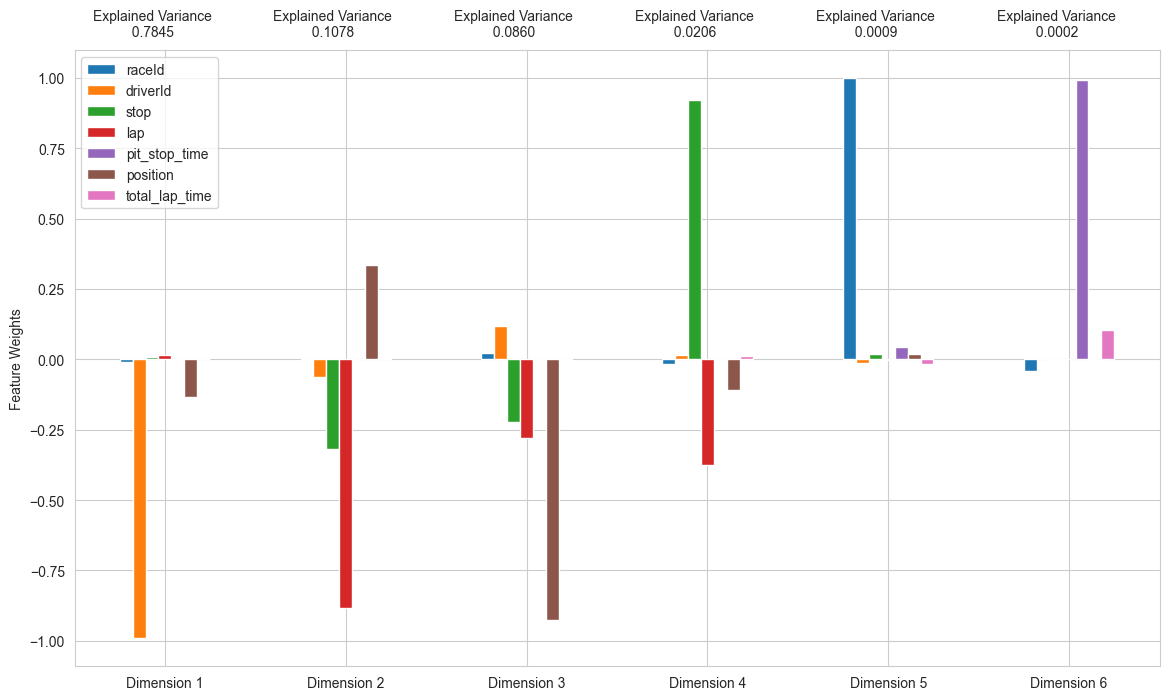

In [62]:
pca_results = vs.pca_results(good_data,pca)

In [64]:
pca = PCA(n_components=2).fit(good_data)
reduced_data = pca.transform(good_data)
pca_samples = pca.transform(log_data)
reduced_data = pd.DataFrame(reduced_data,columns=['Dimension 1','Dimension 2'])

<Axes: title={'center': 'PC plane with original feature projections.'}, xlabel='Dimension 1', ylabel='Dimension 2'>

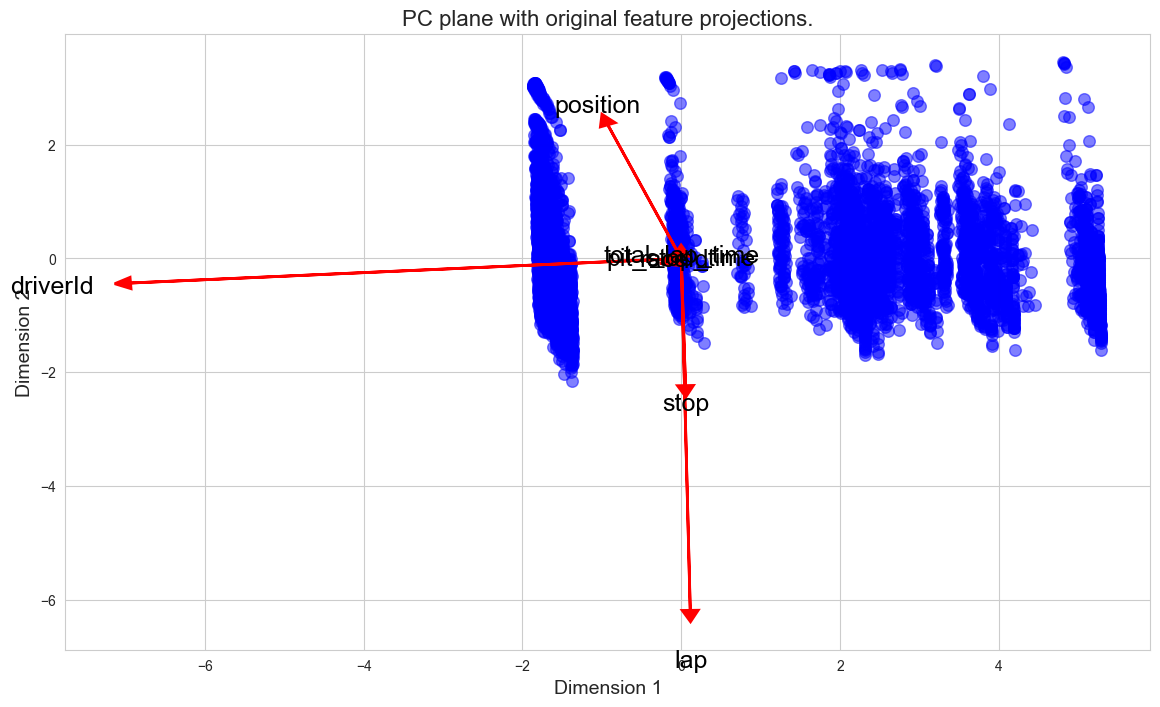

In [65]:
vs.biplot(good_data,reduced_data,pca)

/Users/nirmolcho/opt/anaconda3/lib/python3.9/ds_final_task/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nirmolcho/opt/anaconda3/lib/python3.9/ds_final_task/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nirmolcho/opt/anaconda3/lib/python3.9/ds_final_task/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/nirmolcho/opt/anaconda3/lib/python3.

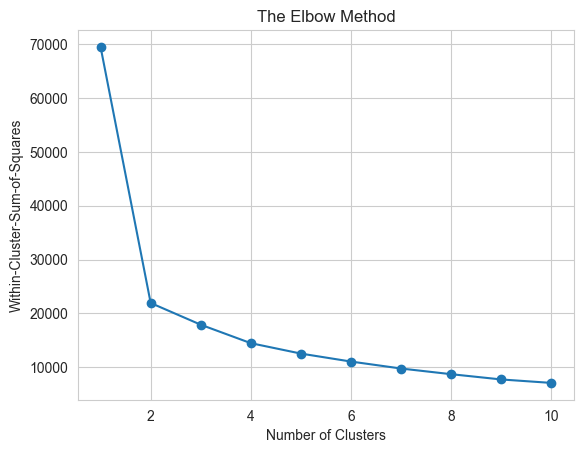

In [67]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(log_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss,marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares");

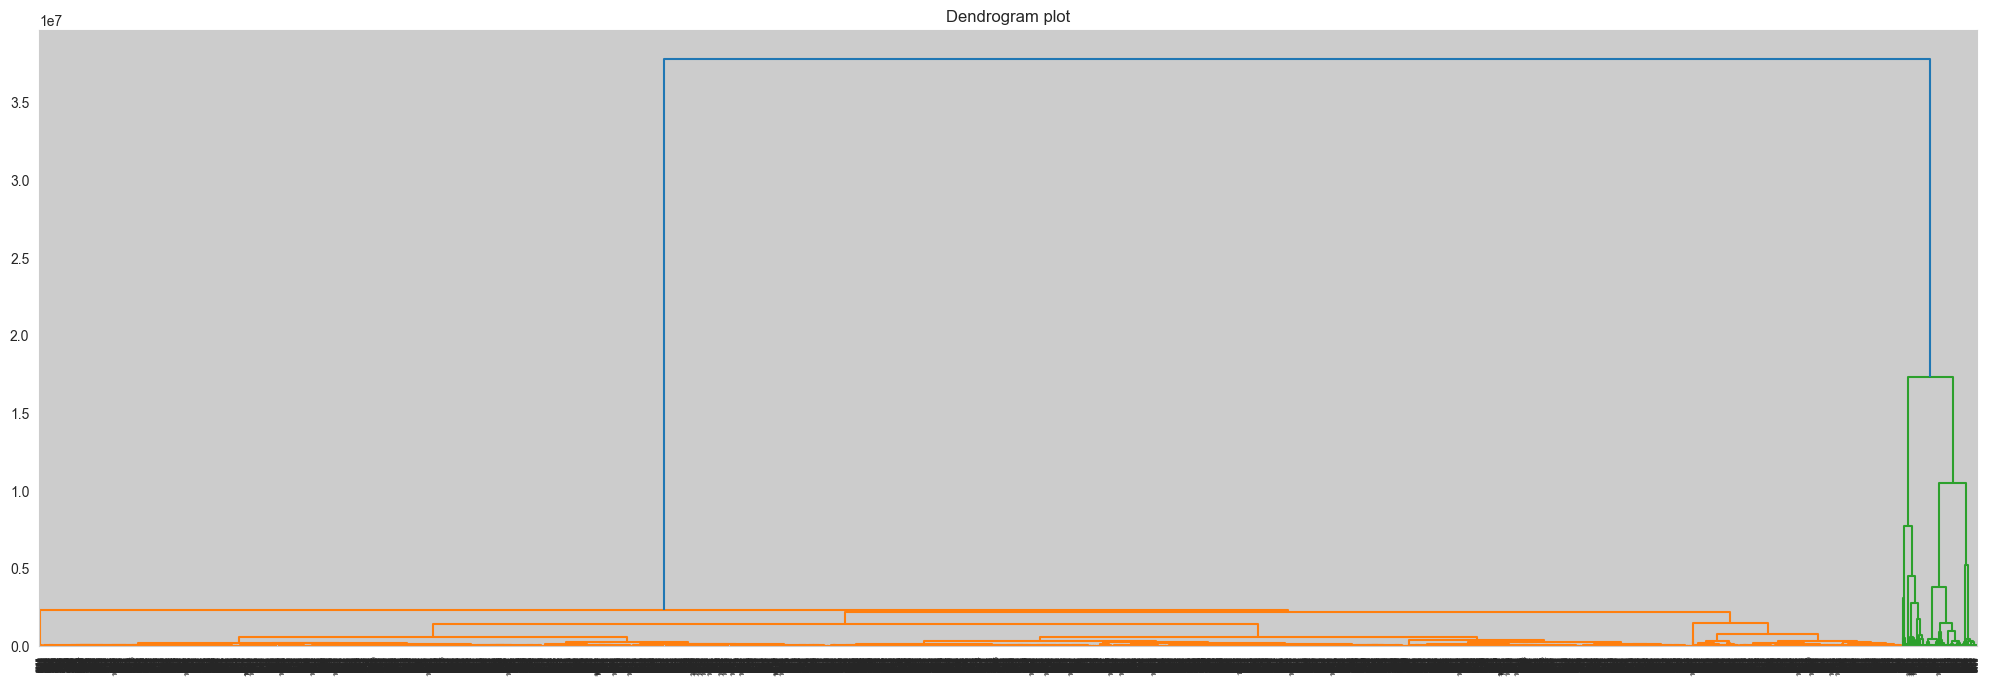

In [69]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(25,8))
dendrogram=sch.dendrogram(sch.linkage(final,method = 'ward'))
plt.title('Dendrogram plot')
plt.show()